<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/blob/master/02_%5BTALLER%5D_FUNCION_GAUSSIANA_Y_TEOREMA_DE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


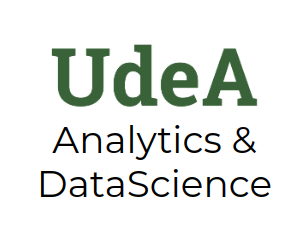

In [ ]:
Image("local/imgs/udea-datascience.png")

# **TALLER 2: Función Gaussiana y Teorema de Bayes**
## Desarrollado por: Ph.D. Javier Fernando Botía Valderrama
## Universidad de Antioquia

Por favor, ingrese la siguiente información:

**Nombre Completo:**

**Cédula:**

**Correo Institucional:**

#**PARTE A: Clasificación de datos con Análisis Discriminante Lineal**

Considere el siguiente problema:

En una base de datos, hay 20 características o variables y 7400 muestras u observaciones que se obtuvieron de un experimento de laboratorio. Los datos representan dos distribuciones Gaussianas multivariables, clasificados en 2 clases, etiquetados como $0$ y $1$. 

In [ ]:
import pandas as pd

datos = pd.read_table("local/data/twonorm.txt", sep = ",", names = None) # Lee los datos con separación con coma entre datos
display(datos)

A1      A2      A3      A4  ...     A18     A19     A20   Clases
0    -1.2036 -2.6240  0.5963  1.3859  ... -3.0514 -1.0650 -0.8541        1
1     0.1713 -0.1669 -0.4155 -0.9974  ... -1.1801  1.3244  0.0202        1
2     0.7743 -0.6060 -1.9338 -0.3614  ... -2.7570 -1.1497  0.0191        1
3    -1.2444  1.0990 -1.4684 -1.7003  ... -0.9101  0.0747  1.1082        1
4    -0.5520  0.3249  0.7253  0.2089  ...  0.1541 -0.2981  0.5216        1
...      ...     ...     ...     ...  ...     ...     ...     ...      ...
7395  0.3646  1.7552 -1.1186  0.2591  ...  0.0802  0.9636  0.9932        0
7396  1.3475  2.5553  0.3640  0.9307  ...  1.2921  0.5883  1.8063        0
7397  0.4542 -0.8451 -0.3094  0.1490  ...  0.3362 -0.9813 -2.0456        1
7398 -0.2055  0.6028 -0.3689  0.4060  ... -1.6509  0.5711  0.5972        1
7399  1.9430  1.7931  1.6335 -0.4527  ...  1.5867  1.0505  0.7328        0

[7400 rows x 21 columns]

In [ ]:
data = datos.values # Extraer valores de la base de datos, generando un array multidimensional de 7400 x 21
X = data[:,0:20] # Datos
Y = data[:,20:21] # Clases

A partir de los datos $X$ y el vector de clases $Y$, separar en $70\%$ en datos de entrenamiento y $30\%$ en datos de prueba. Una vez separado los datos, obtener un modelo basado en análisis discriminante lineal capaz de clasificar los datos de prueba con la menor cantidad de datos incorrectos posible. 

*Ingrese aquí las conclusiones*

#**PARTE B: Estimación Bayesiana de una cirugía de un implante de cadera**

Considere el siguiente problema:

Una EPS se contacta con una empresa especializada en implantes y le solicita crear implantes de cadera con una media de 1 mm de grosor y con una varianza de más o menos 0.25 $mm^2$, el cual se puede modelar mediante una distribución Gaussiana (esta sería la distribución aposteriori Gaussiana que se desea encontrar). 

Considerando lo anterior, un paciente va a la EPS con una orden médica para solicitar la aprobación de la cirugía de la cadera pero la EPS dice que debe esperar dos semanas hasta que la empresa de implantes cumpla con los requisitos para proceder a la cirugia. A partir de lo anterior, la empresa especializada en implantes de cadera considera como punto de partida una distribución apriori Gaussiana con una media de 0.9 mm y una varianza de 0.2 $mm^2$. Para este caso, se considera un espacio muestral de 0 a 2 mm para representar la distribución apriori, como se indica a continuación:

In [21]:
import numpy as np

media_conocida_apriori = 0.9
varianza_conocida_apriori = 0.2

N = 5000 # número de valores
x = np.linspace(0,2,N, endpoint=False)

# Se debe generar la distribución apriori Gaussiana a partir de lo anterior
# Coloque el código restante en este espacio


Por otra parte, la empresa especializada en implantes de cadera considera que la distribución que regulariza los cálculos también es una distribución Gaussiana. Para encontrar tal distribución, se recomienda aplicar la máxima verosimilitud de la distribución Gaussiana o a través de la función condicional Gaussiana, que permita estimar los valores de la media y la varianza que permita ajustarse al modelo que se desea encontrar. Para este caso, consideren el siguiente código:

Si se selecciona con la máxima verosimilitud de la distribución Gaussiana

In [22]:
def MLE_G(X):  # Máxima verosimilitud de la distribución Gaussiana                                                                                                                                                                             
    MU = X.mean(axis=0)                                                                                                                                                                            
    VAR = ((X - MU).T @ (X - MU)) / (X.shape[0] - 1) 
    return MU, VAR

In [46]:
import numpy as np
from scipy.stats import multivariate_normal, norm

media_inicial = [0.9, 0.9] # Estimado por la empresa                                                                                                                                                                                
cov_inicial = [[1, 0.2], [0.2, 1]] # Estimado por la empresa

X_aleatorio = np.random.multivariate_normal(media_inicial, cov_inicial, N) # Se genera un conjunto de valores aleatorios con una distribución normal

media_mv, cov_mv = MLE_G(X_aleatorio)
media_elegida = media_mv[0]
varianza_elegida = cov_mv[0,1] 

Prob_regulariza = multivariate_normal.pdf(x, mean = media_elegida, cov = varianza_elegida)

Si se selecciona con la función de probabilidad condicional Gaussiana

In [47]:
def Gaussians(X, Media, Varianza):
    return ((1. / np.sqrt(2 * np.pi * Varianza)) * np.exp(-(X - Media)**2 / (2 * Varianza)))

In [49]:
media_inicial = np.matrix([0.9, 0.9]) # Estimado por la empresa                                                                                                                                                                                
cov_inicial = np.matrix([[1, 0.2], [0.2, 1]]) # Estimado por la empresa

media_1 = media_inicial[0,0]
media_2 = media_inicial[0,1]

Sigma_AA = cov_inicial[0,0]
Sigma_BB = cov_inicial[1,1]
Sigma_AB = cov_inicial[0,1]
Sigma_BA = cov_inicial[1,0]

x_b = 1 # Valor de referencia (1 mm)

media_ab = media_1 + (Sigma_AB*(1/Sigma_BB)*(x_b - media_2))
covarianza_ab = Sigma_AA - (Sigma_AB*(1/Sigma_BB)*Sigma_BA)

Prob_regulariza = Gaussians(x, media_ab, covarianza_ab)

Teniendo en cuenta la distribución apriori así como la función de probabilidad que regulariza (ya sea que seleccionó con la máxima versimilitud de la distribución Gaussiana o con la función de probabilidad condicional Gaussiana), determine la distribución aposteriori Gaussiana que genere un valor de la media de 1 mm y una varianza menor o igual a 0.25 $mm^2$ (se debe calcular la media y la varianza de la distribución aposteriori Gaussiana que estimen). 

Luego de encontrar lo anterior, calcule la pérdida cuadrática entre la media de 1 mm (lo que se desea alcanzar) y la media de la distribución aposteriori Gaussiana. Además, calcule la pérdida cuadrática de la varianza.

*Ingrese aquí las conclusiones*

#**PARTE C: Clasificador Bayes Ingenuo para resolver el problema de las bananas**

Considere el siguiente problema:

En el Uraba Antioqueño, se esta desarrollando un sistema de visión artificial para clasificar bananas para exportación y para el mercado nacional. Debido a que los países Europeos exigen bananas con ciertas características de tamaño y forma, se requiere que el sistema de visión artificial tenga el menor margen de error a la hora de tomar una decisión de las características de la banana. Entonces, uno de los ingenieros que desarrolla el sistema propone crear modelos de clasificación Naive Bayes para facilitar la clasificación pero no esta seguro del desempeño que generará el sistema en las pruebas. Para lo anterior, se crea una base de datos de dos tipos de banana representativos que permitirá crear el modelo deseado. 

A partir de la anterior descripción, se debe probar diferentes propuestas de clasificador bayesiano ingenuo para garantizar cuál de ellos tiene el mejor puntaje en la clasificación. Se recomienda separar los datos en $70\%$ para entrenamiento y $30\%$ para prueba.

In [ ]:
import pandas as pd

bananas = pd.read_table("local/data/banana.dat", sep = ",", names = None) # Lee los datos con separación con coma entre datos
display(bananas)

At1    At2   Clases
0     1.140 -0.114     -1.0
1    -1.520 -1.150      1.0
2    -1.050  0.720     -1.0
3    -0.916  0.397      1.0
4    -1.090  0.437      1.0
...     ...    ...      ...
5295  0.335  1.390      1.0
5296 -1.700 -0.569      1.0
5297  2.640  1.140      1.0
5298  0.769  0.772     -1.0
5299 -0.255 -0.142      1.0

[5300 rows x 3 columns]

*Ingrese aquí las conclusiones*

#**PARTE D: Aplicación de la inferencia Bayesiana con la distribución Beta**

La inferencia Bayesiana de una distribución Beta se puede definir debido al hecho que proporciona una familia de distribuciones conjugadas apriori para distribuciones binomiales e inclusive geométrica. Lo anterior se puede expresar mediante la siguiente regla Bayesiana:

$$\mathbb{P}(\rho;\alpha,\beta) = \frac{\rho^{\alpha - 1}(1-\rho)^{\beta - 1}}{B(\alpha,\beta)}$$

donde $\rho$ es un valor de probabilidad binomial. A partir de esta definición, Considere el siguiente problema:

En una empresa de desarrollo de software, hay un equipo de ingenieros de sistemas dedicados a la calidad de software que ayudan a identificar anomalias en el funcionamiento de software para empresas de entretenimiento como Disney. Durante los ensayos, encontraron varias fallas en el frontend pero no sabían como pronosticar fallas a futuro. Entonces, se asesoraron de un estadístico que recomendo modelar tales fallas como una inferencia Bayesiana de una distribución beta. En este caso, los ensayos arrogaron los siguientes datos:

*   $\alpha = 2$, $\beta = 5$ y $\rho = 0.75$
*   $\alpha = 3$, $\beta = 6$ y $\rho = 0.69$
*   $\alpha = 2$, $\beta = 9$ y $\rho = 0.5$
*   $\alpha = 3$, $\beta = 7$ y $\rho = 0.71$
*   $\alpha = 2$, $\beta = 10$ y $\rho = 0.6$
*   $\alpha = 4$, $\beta = 8$ y $\rho = 0.59$
*   $\alpha = 3$, $\beta = 8$ y $\rho = 0.75$
*   $\alpha = 2$, $\beta = 7$ y $\rho = 0.77$
*   $\alpha = 3$, $\beta = 5$ y $\rho = 0.95$
*   $\alpha = 2$, $\beta = 5$ y $\rho = 0.89$
*   $\alpha = 4$, $\beta = 6$ y $\rho = 0.88$
*   $\alpha = 2$, $\beta = 4$ y $\rho = 0.7$

A partir de estos ensayos, los valores $\rho$ fueron suministrados por los propios ingenieros de sistemas de acuerdo a su experiencia del funcionamiento del software. El objetivo principal que desean encontrar los ingenieros de sistemas es determinar cuál de los ensayos hay mayor probabilidad aposteriori que ocurra una falla del software dado una probabilidad $\rho$.

In [ ]:
def Inf_Bay_Beta(a,b,beta_ab,p): # Crear una funcion que represente la inferencia Bayesiana de una distribución Beta


In [ ]:
from scipy.special import beta # Función Beta

# alpha_value = 
# beta_value = 
# BETA_AB = beta(alpha_value,beta_value)


*Ingrese aquí las conclusiones*

#**PARTE E: Distribución Gaussiana Multivariada aplicado en espectros ópticos**

Considere el siguiente problema:

En un laboratorio de comunicaciones ópticas, se esta realizando un experimento con un dispositivo llamado filtro óptico programable, que se encarga de mejorar la forma de espectros ópticos. Estos dispositivos son útiles para evitar que en la etapa de recepción de un sistema de comunicaciones ópticas, se genere errores en la conversión óptico-eléctrico o para mejorar la modulación óptica para transmitir información a una alta tasa de transmisión. Durante unos ensayos realizados, se obtuvieron los siguientes datos de diferentes espectros que fueron mejorados por el filtro óptico programable: 

Espectro 1  Espectro 2  Espectro 3  Espectro 4
0         -210.0      -210.0      -210.0      -210.0
1         -210.0      -210.0      -210.0      -210.0
2         -210.0      -210.0      -210.0      -210.0
3         -210.0      -210.0      -210.0      -210.0
4         -210.0      -210.0      -210.0      -210.0
...          ...         ...         ...         ...
2496      -210.0      -210.0      -210.0      -210.0
2497      -210.0      -210.0      -210.0      -210.0
2498      -210.0      -210.0      -210.0      -210.0
2499      -210.0      -210.0      -210.0      -210.0
2500      -210.0      -210.0      -210.0      -210.0

[2501 rows x 4 columns]

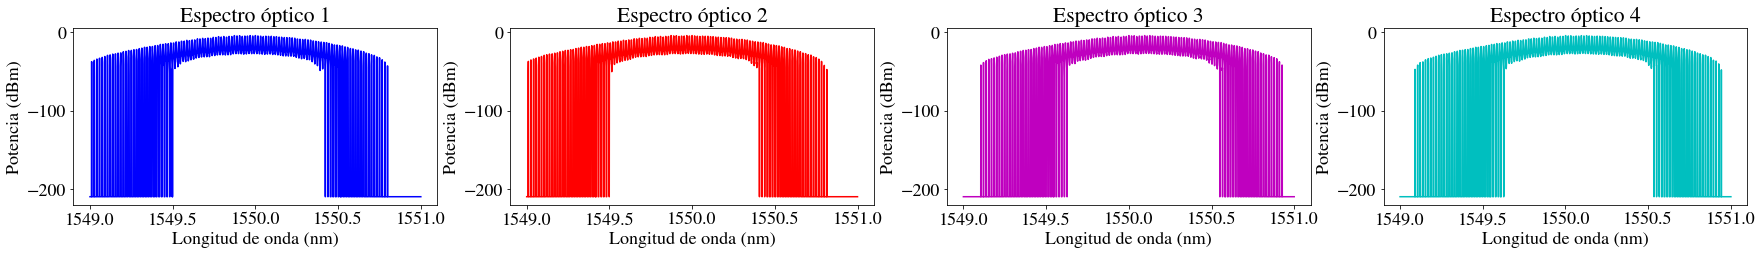

In [ ]:
import pandas as pd
from matplotlib import pyplot
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Peines = pd.read_excel("local/data/PeinesGaussianos.xlsx", sep = ",", names = None) # Lee los datos con separación con coma entre datos
display(Peines)

x = np.linspace(1549,1551,len(Peines))

fig = pyplot.figure(figsize=(30,15))

ax = fig.add_subplot(4, 4, 1)
ax.plot(x, Peines['Espectro 1'], 'b')
pyplot.xlabel('Longitud de onda (nm)') # Etiqueta del eje x
pyplot.ylabel('Potencia (dBm)') # Etiqueta del eje y
pyplot.title('Espectro óptico 1')

ax = fig.add_subplot(4, 4, 2)
ax.plot(x, Peines['Espectro 2'], 'r')
pyplot.xlabel('Longitud de onda (nm)') # Etiqueta del eje x
pyplot.ylabel('Potencia (dBm)') # Etiqueta del eje y
pyplot.title('Espectro óptico 2')

ax = fig.add_subplot(4, 4, 3)
ax.plot(x, Peines['Espectro 3'], 'm')
pyplot.xlabel('Longitud de onda (nm)') # Etiqueta del eje x
pyplot.ylabel('Potencia (dBm)') # Etiqueta del eje y
pyplot.title('Espectro óptico 3')

ax = fig.add_subplot(4, 4, 4)
ax.plot(x, Peines['Espectro 4'], 'c')
pyplot.xlabel('Longitud de onda (nm)') # Etiqueta del eje x
pyplot.ylabel('Potencia (dBm)') # Etiqueta del eje y
pyplot.title('Espectro óptico 4')

pyplot.show()

A partir de la anterior base de datos, determinar:

1.   Calcular la envolvente de cada espectro, por medio de una distribución Gaussiana, usando la siguiente libreria:

from scipy.signal import find_peaks

PE = Peines.values

peaks, _ = find_peaks(Peines['Espectro 1'], distance = 10)

pyplot.plot(x[peaks], PE[peaks,0:1], 'r')

Variar el parámetro *distance* hasta obtener la mejor envolvente Gaussiana posible. Guarde cada espectro envolvente con un nombre diferente, por ejemplo, Envolvente_1 = PE[peaks,0:1], y cada vector de picos, por ejemplo, picos_1 = x[peaks]

2.    A partir de las envolventes Gaussianas, calcule la media y la varianza de cada envolvente, a partir de la variable picos.

3.   Graficar las distribuciones Gaussianas Multivariadas de cada envolvente con la media y la varianza calculado en el punto 2.

4.   Comparar la forma de la envolvente con la distribución Gaussiana Multivariada. ¿Qué se puede concluir acerca del análisis?

*Ingrese aquí las conclusiones*

#**PARTE F: Distancia de Mahalanobis en distribuciones de probabilidad Gaussianas**

La distancia de Mahalanobis para distribuciones de probabilidad Gaussiana se expresa como:

$$d_M^2 (x_n,\mu_i) = (x_n - \mu_i)^T \Sigma_i^{-1} (x_n - \mu_i)$$

siendo $\Sigma_i^{-1}$ la inversa de la matriz de covarianza de una clase $i$, donde $\Sigma$ esta dado por:

$$\Sigma_i = \frac{1}{N - 1} \sum_{n=1}^N (x_n - \mu_i)(x_n - \mu_i)^T$$

donde $N$ es el número de muestras o observaciones de los datos y $D$ es el número de descriptores, variables, atributos o características.

La siguiente función de Python representa el cálculo de la distancia de Mahalanobis:

In [ ]:
def f_dis_Mahalanobis(x, XX, media):
  Mat_cov_Inversa = pinv(np.cov(x), rcond=1e-15)
  A = (x - np.ones((x.shape[1], 1)).dot(np.atleast_2d(media)).T).T.dot(Mat_cov_Inversa)
  Decisiones = np.prod([A, (x - np.ones((x.shape[1], 1)).dot(np.atleast_2d(media)).T).T], axis=0)
  B = (XX - np.ones((XX.shape[1], 1)).dot(np.atleast_2d(media)).T).T.dot(Mat_cov_Inversa)
  FE = np.prod([B, (XX - np.ones((XX.shape[1], 1)).dot(np.atleast_2d(media)).T).T], axis=0)
  UMBRALES = np.array([FE[:,0], FE[:,1]]).T
  CLASES_U = np.argmax(UMBRALES, axis = 1)
  return Decisiones, CLASES_U

A partir de la anterior descripción, considere el siguiente problema de la parte A de esta unidad:

Para esta etapa del taller, solo consideramos dos variables o características de la base de datos:

In [ ]:
import pandas as pd
import numpy as np

datos = pd.read_table("local/data/twonorm.txt", sep = ",", names = None) # Lee los datos con separación con coma entre datos
dd = datos.values
datos_seleccionados = dd[:,0:2]
clases = dd[:,20:21]

media_conocida1 = datos_seleccionados[:,0:1].mean()
std_conocida1 = np.std(datos_seleccionados[:,0:1])

media_conocida2 = datos_seleccionados[:,1:2].mean()
std_conocida2 = np.std(datos_seleccionados[:,1:2])

print(datos_seleccionados)

[[-1.2036 -2.624 ]
 [ 0.1713 -0.1669]
 [ 0.7743 -0.606 ]
 ...
 [ 0.4542 -0.8451]
 [-0.2055  0.6028]
 [ 1.943   1.7931]]


Teniendo en cuenta los datos seleccionados, se enuncia los siguientes puntos a resolver:

1.   Graficar los histogramas de cada característica.
1.   Clasificar los datos con la función discriminante con distancia de Mahalanobis, considerando primero las clases originales y luego con las clases obtenidas desde la función discriminante.
2.   Clasificar los datos con la función discriminante con distancia Euclidiana, considerando primero las clases originales y luego con las clases obtenidas desde la función discriminante.
3.   Compáre los resultados obtenidos.

**Pista:** Considere el número de muestras u observaciones en la base datos para determina las variables aleatorias con distribución normal. Además, considere solamente las medias y desviaciones estándar dados en el ejercicio para realizar el resto de cálculos.

*Ingrese aquí las conclusiones*